In [2]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pickle

    
with open('language_activities.pkl', 'rb') as x:
    language_activities = pickle.load(x)

print("El diccionario language_activities ha sido cargado correctamente.")

# Diccionario de números para cada categoría
category_dict = {
    'art': 1,
    'events': 2,
    'foods': 3,
    'games': 4,
    'geography': 5,
    'health': 6,
    'history': 7,
    'mathematics': 8,
    'nature': 9,
    'philosophy': 10,
    'politics': 11,
    'religion': 12,
    'rights': 13,
    'sports': 14
}


data_list = []
for language, categories_data in language_activities.items():
    for category, activity in categories_data.items():
        category_number = category_dict[category]
        for (day_of_week, hour), edits in activity.items():
            # Crear una columna que represente la hora de la semana
            week_hour = day_of_week * 24 + hour
            data_list.append([language, category_number, week_hour, edits])

data = pd.DataFrame(data_list, columns=['language', 'category', 'week_hour', 'edits'])

# Pivotar el DataFrame para que cada hora de la semana sea una columna y cada fila sea una combinación de idioma y categoría
data_pivot = data.pivot_table(index=['language'], columns=['week_hour', 'category'], values='edits', fill_value=0)

# Normalizar los datos utilizando z-score
scaler = StandardScaler()
#data_scaled = scaler.fit_transform(data_pivot)




El diccionario language_activities ha sido cargado correctamente.


In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# Turn the dataframe into a numpy object
df = data_pivot.values

In [34]:
from sklearn.preprocessing import StandardScaler
# Supongamos que df es tu DataFrame o array de numpy
data = df  # Si df ya es un numpy array, no necesitas convertirlo

# Normalización de los datos usando StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [35]:
data

array([[-0.96236412, -0.71035415, -0.86234464, ..., -0.69941923,
        -0.64384267, -1.06058383],
       [ 2.11329322, -0.44727187, -0.55281217, ...,  1.89553637,
         0.23707595,  1.31157578],
       [ 0.93839954,  1.57688754,  0.72515852, ...,  0.75088162,
         2.75731205,  1.30334691],
       ...,
       [-0.54191666, -0.50166833,  0.07054331, ..., -0.31061446,
        -0.45058676, -0.76334697],
       [-1.28788969, -0.87998609, -1.15348905, ..., -1.32336234,
        -0.75524462, -1.2312706 ],
       [-0.47191592, -0.73439752, -0.80840631, ..., -0.85865208,
        -0.54952782, -0.79962881]])

In [36]:
df.shape

(11, 2184)

In [37]:
n_input_layer = df.shape[1]
n_hidden1 = 30
n_hidden2 = 15
n_hidden3 = 15

n_encoding_layer = 10

n_hidden5 = 15
n_hidden6 = 15
n_hidden7 = 30
n_output_layer = n_input_layer  # of course, the output layer must be of the same size of the input layer
     

In [38]:

# Placeholders are kind of "empty variables" in a TF computational graph.
# I will feed the actual data through them - in the graph, they are like entry doors for my data

#X = tf.placeholder(tf.float32, shape = [None, df.shape[1]], name='X')
X = tf.keras.layers.Input(shape=(df.shape[1],), name='X')

In [39]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
# Definición de la arquitectura del autoencoder
input_layer = Input(shape=(n_input_layer,), name="input_layer")
hidden1 = Dense(n_hidden1, activation=tf.nn.leaky_relu, name="hidden_layer1")(input_layer)
hidden2 = Dense(n_hidden2, activation=tf.nn.leaky_relu, name="hidden_layer2")(hidden1)
hidden3 = Dense(n_hidden3, activation=tf.nn.leaky_relu, name="hidden_layer3")(hidden2)
encoding_layer = Dense(n_encoding_layer, activation=tf.nn.leaky_relu, name="encoding_layer")(hidden3)
hidden5 = Dense(n_hidden5, activation=tf.nn.leaky_relu, name="hidden_layer5")(encoding_layer)
hidden6 = Dense(n_hidden6, activation=tf.nn.leaky_relu, name="hidden_layer6")(hidden5)
hidden7 = Dense(n_hidden7, activation=tf.nn.leaky_relu, name="hidden_layer7")(hidden6)
output_layer = Dense(n_output_layer, activation=tf.nn.leaky_relu, name="output_layer")(hidden7)

In [40]:
# set number of epochs
n_epochs = 5000

# set learning rate
learning_rate = 0.001

In [41]:
# implement Mean Squared Error
loss = tf.reduce_mean(tf.square(X - output_layer))

In [42]:
from tensorflow.keras.models import Model
# Define the TensorFlow operation that trains the model
#training_op = tf.train.AdamOptimizer(learning_rate).minimize(loss)
# Construcción del modelo autoencoder
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# Definir el optimizador y compilar el modelo
autoencoder.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate), loss='mean_squared_error')

In [43]:
# Guardar solo los pesos del modelo
autoencoder.save_weights('Encoder.h5')

In [44]:
print(autoencoder.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 2184)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 30)                65550     
                                                                 
 hidden_layer2 (Dense)       (None, 15)                465       
                                                                 
 hidden_layer3 (Dense)       (None, 15)                240       
                                                                 
 encoding_layer (Dense)      (None, 10)                160       
                                                                 
 hidden_layer5 (Dense)       (None, 15)                165       
                                                                 
 hidden_layer6 (Dense)       (None, 15)                240 

In [45]:
data

array([[-0.96236412, -0.71035415, -0.86234464, ..., -0.69941923,
        -0.64384267, -1.06058383],
       [ 2.11329322, -0.44727187, -0.55281217, ...,  1.89553637,
         0.23707595,  1.31157578],
       [ 0.93839954,  1.57688754,  0.72515852, ...,  0.75088162,
         2.75731205,  1.30334691],
       ...,
       [-0.54191666, -0.50166833,  0.07054331, ..., -0.31061446,
        -0.45058676, -0.76334697],
       [-1.28788969, -0.87998609, -1.15348905, ..., -1.32336234,
        -0.75524462, -1.2312706 ],
       [-0.47191592, -0.73439752, -0.80840631, ..., -0.85865208,
        -0.54952782, -0.79962881]])

In [46]:
from tensorflow.keras.callbacks import Callback
# Callback para monitorear la pérdida
class LossHistory(Callback):
    def on_train_begin(self, logs=None):
        self.losses = []

    def on_epoch_end(self, epoch, logs=None):
        self.losses.append(logs.get('loss'))
        # if epoch % 100 == 0:
        #     print(f"{epoch+1}. Loss: {logs.get('loss')},")

loss_history = LossHistory()

# Entrenamiento del modelo con el callback
history=autoencoder.fit(data, data, epochs=n_epochs, batch_size=256, shuffle=True, callbacks=[loss_history])

# Guardar el modelo completo
autoencoder.save('autoencoder_model_standarizada.h5')

# Extracción de la parte del encoder para la reducción de dimensionalidad
encoder = Model(inputs=input_layer, outputs=encoding_layer)

# Transformación de los datos
encoded_data = encoder.predict(data)


print("Encoding complete.")

Epoch 1/5000
1/1 [==============================] - 0s 188ms/step - loss: 0.9994
Epoch 2/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.9804
Epoch 3/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.9535
Epoch 4/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.9217
Epoch 5/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.8888
Epoch 6/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.8633
Epoch 7/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.8506
Epoch 8/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.8372
Epoch 9/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.8123
Epoch 10/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.7820
Epoch 11/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7587
Epoch 12/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.7421
Epoch 13/5000
1/1 [============================

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 1272/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 1273/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 1274/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 1275/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 1276/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 1277/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 1278/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 1279/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 1280/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 1281/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 1282/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 1283/5000
1/1 [===========

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 2ms/step - loss: 3.6395e-06
Epoch 2567/5000
1/1 [==============================] - 0s 2ms/step - loss: 3.1208e-06
Epoch 2568/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.0196e-06
Epoch 2569/5000
1/1 [==============================] - 0s 3ms/step - loss: 4.9708e-06
Epoch 2570/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.0795e-06
Epoch 2571/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.1067e-06
Epoch 2572/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.8706e-06
Epoch 2573/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.2891e-06
Epoch 2574/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.3007e-06
Epoch 2575/5000
1/1 [==============================] - 0s 3ms/step - loss: 2.4860e-06
Epoch 2576/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.5446e-06
Epoch 2577/5000
1/1 [==============================] - 0s 2ms/step - l

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Epoch 3860/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.4903e-05
Epoch 3861/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.0332e-05
Epoch 3862/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.7309e-05
Epoch 3863/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.7489e-05
Epoch 3864/5000
1/1 [==============================] - 0s 2ms/step - loss: 8.4398e-05
Epoch 3865/5000
1/1 [==============================] - 0s 2ms/step - loss: 7.2555e-05
Epoch 3866/5000
1/1 [==============================] - 0s 2ms/step - loss: 5.6655e-05
Epoch 3867/5000
1/1 [==============================] - 0s 2ms/step - loss: 4.0986e-05
Epoch 3868/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.8932e-05
Epoch 3869/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.5259e-05
Epoch 3870/5000
1/1 [==============================] - 0s 2ms/step - loss: 2.8854e-05
Epoch 3871/5000
1/1 [==============================] -

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



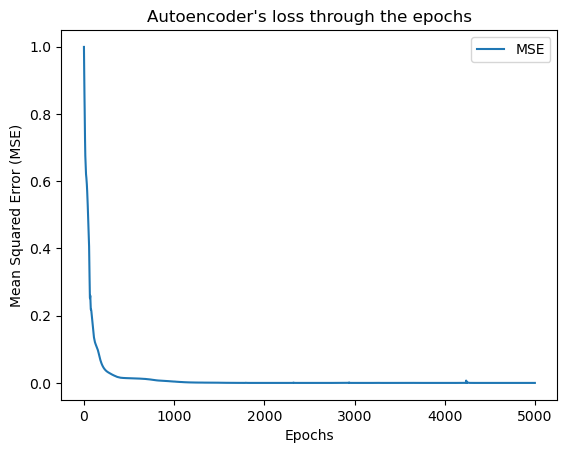

In [47]:
# Graficar la pérdida a lo largo de las épocas
plt.plot(loss_history.losses, label="MSE")
plt.title("Autoencoder's loss through the epochs")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.show()

In [48]:
# You can save it in a pandas dataframe
encoded_pandas_dataframe = pd.DataFrame(encoded_data)

# Let's take a look:
encoded_pandas_dataframe.describe()

,0,1,2,3,4,5,6,7,8,9
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,1.561542,-11.327139,-7.688862,3.681087,-2.601962,2.780292,11.007776,-5.002946,26.242298,-20.905306
std,17.483471,18.227701,3.910256,17.320532,19.843679,16.424364,18.981045,20.745558,35.887249,22.460848
min,-19.901920,-40.821880,-14.595784,-12.659013,-24.067059,-20.408415,-5.298450,-35.400234,-10.288227,-57.130329
25%,-12.143259,-21.599683,-9.682179,-9.390469,-16.614417,-8.447337,-3.159326,-15.592595,-8.781137,-37.029951
50%,-2.304598,-7.402361,-7.047591,-2.934711,-2.864985,-1.233433,-0.031513,-3.581821,22.380384,-12.172401
75%,15.145282,-1.074916,-6.204027,11.088609,0.685898,15.173877,25.467951,4.048267,63.435213,-3.428414
max,31.542843,14.961466,-1.554037,35.946190,36.788189,28.867666,47.702541,31.089649,71.219414,6.623025


In [49]:
encoded_pandas_dataframe

,0,1,2,3,4,5,6,7,8,9
0,-10.120744,-26.644022,-11.894773,-7.674947,-20.341333,-10.640422,-4.060406,-22.411016,71.219414,-40.772594
1,-3.603188,-7.402361,-6.677455,-3.297864,29.821354,-1.233433,30.650831,-3.581821,-7.932210,-12.172401
2,23.680815,8.545202,-7.112379,35.946190,2.675400,21.586908,47.702541,20.968485,-10.288227,1.014657
3,-0.619561,-0.952982,-3.243183,8.517501,36.788189,28.867666,20.285070,31.089649,-10.202498,-2.875904
4,-19.901920,-40.821880,-12.574641,-12.659013,-19.570700,-20.408415,-4.704919,-35.400234,41.085239,-55.247509
5,-14.165773,-16.555344,-7.047591,-11.105991,-1.303604,-6.254252,6.165780,-8.041721,-9.630064,-33.287308
6,19.654692,14.961466,-1.554037,13.659718,-2.560709,19.388420,-0.031513,9.415583,22.380384,6.623025
7,31.542843,-1.196850,-6.277274,33.026821,-2.864985,10.959334,34.577518,-1.319048,-3.540179,-3.980924
8,-2.304598,-10.849835,-7.469585,-2.934711,-13.658134,-2.630437,-2.258245,-8.774174,58.596783,-20.084339
9,-17.621469,-39.974503,-14.595784,-12.003112,-24.067059,-18.109604,-5.298450,-34.123375,68.702980,-57.130329


In [50]:
import pandas as pd

# Supongamos que encoded_pandas_dataframe es tu DataFrame actual
encoded_pandas_dataframe = pd.DataFrame(encoded_data)

# Lista de nuevos índices de fila
new_index = ['ar', 'de', 'es', 'fr', 'hu', 'it', 'ja', 'pt', 'ru', 'vi', 'zh']

# Asegúrate de que el tamaño del índice coincida con el número de filas en el DataFrame
if len(new_index) == encoded_pandas_dataframe.shape[0]:
    encoded_pandas_dataframe.index = new_index
else:
    raise ValueError("El tamaño del índice nuevo no coincide con el número de filas en el DataFrame")

# Mostrar el DataFrame con los nuevos índices
print(encoded_pandas_dataframe)

            0          1          2          3          4          5  \
ar -10.120744 -26.644022 -11.894773  -7.674947 -20.341333 -10.640422   
de  -3.603188  -7.402361  -6.677455  -3.297864  29.821354  -1.233433   
es  23.680815   8.545202  -7.112379  35.946190   2.675400  21.586908   
fr  -0.619561  -0.952982  -3.243183   8.517501  36.788189  28.867666   
hu -19.901920 -40.821880 -12.574641 -12.659013 -19.570700 -20.408415   
it -14.165773 -16.555344  -7.047591 -11.105991  -1.303604  -6.254252   
ja  19.654692  14.961466  -1.554037  13.659718  -2.560709  19.388420   
pt  31.542843  -1.196850  -6.277274  33.026821  -2.864985  10.959334   
ru  -2.304598 -10.849835  -7.469585  -2.934711 -13.658134  -2.630437   
vi -17.621469 -39.974503 -14.595784 -12.003112 -24.067059 -18.109604   
zh  10.635872  -3.707414  -6.130779  -0.982636 -13.540003   9.057442   

            6          7          8          9  
ar  -4.060406 -22.411016  71.219414 -40.772594  
de  30.650831  -3.581821  -7.932210 -

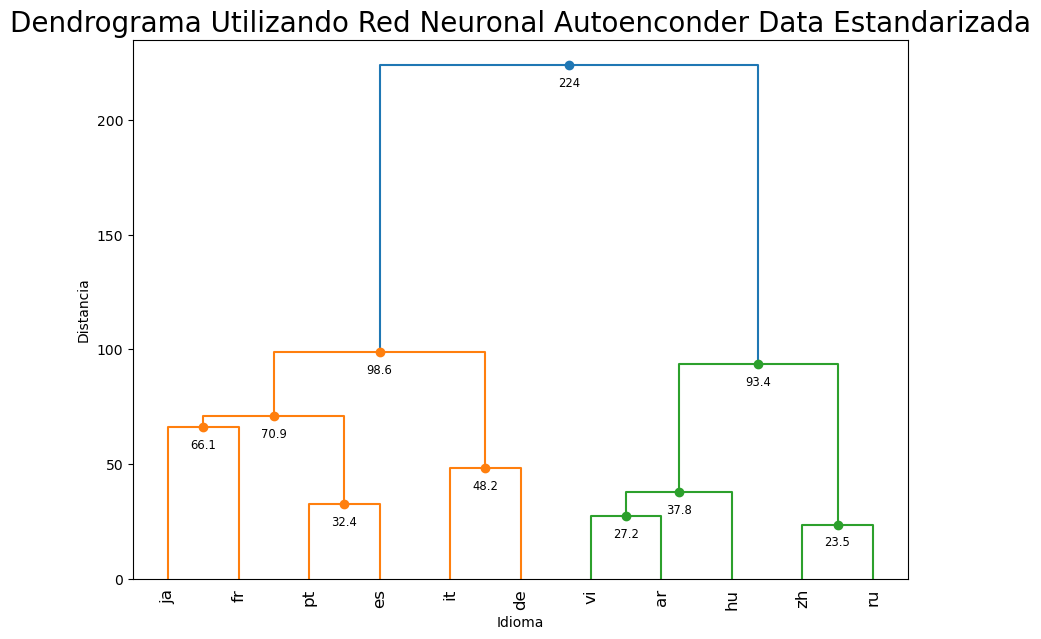

In [51]:
# Realizar la clusterización jerárquica
linked = linkage(encoded_pandas_dataframe, method='ward')

# Crear etiquetas para cada fila basadas en el idioma
labels = encoded_pandas_dataframe.index.tolist()

# Generar el dendrograma y capturar la salida para acceder a las coordenadas de los enlaces
plt.figure(figsize=(10, 7))
dendro = dendrogram(linked,
                    labels=labels,
                    distance_sort='descending',
                    show_leaf_counts=True)

# Añadir anotaciones de distancia
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    x = 0.5 * sum(i[1:3])
    y = d[1]
    if y > 0:  # Solo añadir etiquetas por encima de la línea cero para claridad
        plt.plot(x, y, 'o', c=c)
        plt.annotate(f"{y:.3g}", (x, y), xytext=(0, -8),
                     textcoords='offset points', va='top', ha='center', fontsize='small')
plt.title('Dendrograma Utilizando Red Neuronal Autoenconder Data Estandarizada',fontsize=20)
plt.xlabel('Idioma')
plt.ylabel('Distancia')
plt.xticks(rotation=90)
plt.savefig('ediciones/dendrogram7AutoEncoderEstandarizada.png')
plt.show()